<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Colaboratory là gì?</h1>

Colaboratory &#40;gọi tắt là "Colab"&#41; cho phép bạn viết và thực thi Python trong trình duyệt với các lợi ích sau: 
- Không yêu cầu cấu hình
- Sử dụng miễn phí GPU
- Chia sẻ dễ dàng

Cho dù bạn là <strong>sinh viên</strong>, <strong>nhà khoa học dữ liệu</strong> hay <strong>nhà nghiên cứu AI &#40;trí tuệ nhân tạo&#41;</strong>, Colab đều giúp bạn hoàn thành công việc dễ dàng hơn. Hãy xem phần <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Hướng dẫn về Colab</a> để tìm hiểu thêm hoặc bắt đầu ngay ở bên dưới!

## <strong>Bắt đầu</strong>

Tài liệu bạn đang đọc không phải là trang web tĩnh, mà là một môi trường tương tác được gọi là <strong>sổ tay trên Colab</strong>. Trên đó, bạn có thể viết và thực thi mã.

Ví dụ: sau đây là một <strong>ô chứa mã</strong> có tập lệnh Python ngắn tính toán một giá trị, lưu trữ giá trị đó trong một biến và in kết quả:

## Tài nguyên khác

### Làm việc với Sổ tay trong Colab
- [Tổng quan về Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Hướng dẫn sử dụng Markdown](/notebooks/markdown_guide.ipynb)
- [Nhập thư viện và cài đặt phần phụ thuộc](/notebooks/snippets/importing_libraries.ipynb)
- [Lưu và tải sổ tay trong GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Biểu mẫu tương tác](/notebooks/forms.ipynb)
- [Tiện ích tương tác](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 trong Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Làm việc với dữ liệu
- [Tải dữ liệu: Drive, Trang tính và Google Cloud Storage](/notebooks/io.ipynb) 
- [Biểu đồ: trực quan hóa dữ liệu](/notebooks/charts.ipynb)
- [Bắt đầu sử dụng BigQuery](/notebooks/bigquery.ipynb)

### Khóa học máy học ứng dụng
Khóa học trực tuyến của Google về Máy học có cung cấp một số sổ tay. Hãy xem <a href="https://developers.google.com/machine-learning/crash-course/">trang web của toàn bộ khóa học</a> để biết thêm thông tin.
- [Giới thiệu về Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Các khái niệm về Tensorflow](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [Các bước đầu tiên khi sử dụng TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Giới thiệu về mạng nơron](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Giới thiệu về tính năng nhúng và dữ liệu thưa](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Sử dụng phần cứng tăng tốc
- [TensorFlow có GPU](/notebooks/gpu.ipynb)
- [TensorFlow có TPU](/notebooks/tpu.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/fingers_data-20201222T085954Z-001.zip (Unzipped Files)
!unzip yolov5.zip

In [ ]:
from os import listdir
import cv2
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import ImageDataGenerator

raw_folder = "/content/drive/MyDrive/fingers_data-20201222T085954Z-001.zip (Unzipped Files)/fingers_data/"
def save_data(raw_folder=raw_folder):

    dest_size = (224, 224)
    print("Bắt đầu xử lý ảnh...")

    pixels = []
    labels = []

    # Lặp qua các folder con trong thư mục raw
    for folder in listdir(raw_folder):
        if folder!='.DS_Store':
            print("Folder=",folder)
            # Lặp qua các file trong từng thư mục chứa các em
            for file in listdir(raw_folder  + folder):
                if file!='.DS_Store':
                    print("File=", file)
                    pixels.append( cv2.resize(cv2.imread(raw_folder  + folder +"/" + file),dsize=(224,224)))
                    labels.append( folder)

    pixels = np.array(pixels)
    labels = np.array(labels)#.reshape(-1,1)

    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('pix.data', 'wb')
    # dump information to that file
    pickle.dump((pixels,labels), file)
    # close the file
    file.close()

    return

def load_data():
    file = open('pix.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)


    return pixels, labels

save_data()
X,y = load_data()
















Bắt đầu xử lý ảnh...
Folder= 5 fingers
File= IMG_5535.JPG
File= IMG_5524.JPG
File= IMG_5514.JPG
File= IMG_5530.JPG
File= IMG_5519.JPG
File= IMG_5504.JPG
File= IMG_5509.JPG
File= IMG_5499.JPG
File= IMG_5474.JPG
File= IMG_5484.JPG
File= IMG_5463.JPG
File= IMG_5464.JPG
File= IMG_5494.JPG
File= IMG_5483.JPG
File= IMG_5448.JPG
File= IMG_5453.JPG
File= IMG_5469.JPG
File= IMG_5431.JPG
File= IMG_5436.JPG
File= IMG_5421.JPG
File= IMG_5489.JPG
File= IMG_5458.JPG
File= IMG_5426.JPG
File= IMG_5441.JPG
File= IMG_5416.JPG
File= IMG_5411.JPG
File= IMG_5400.JPG
File= IMG_5395.JPG
File= IMG_5390.JPG
File= IMG_5380.JPG
File= IMG_5385.JPG
File= IMG_5328.JPG
File= IMG_5369.JPG
File= IMG_5339.JPG
File= IMG_5406.JPG
File= IMG_5348.JPG
File= IMG_5359.JPG
File= IMG_5364.JPG
File= IMG_5316.JPG
File= IMG_5354.JPG
File= IMG_5334.JPG
File= IMG_5300.JPG
File= IMG_5322.JPG
File= IMG_5312.JPG
File= IMG_5306.JPG
File= IMG_5311.JPG
File= IMG_5375.JPG
File= IMG_5305.JPG
File= IMG_5285.JPG
File= IMG_5295.JPG
File= IMG_5

In [ ]:
from keras.optimizers import RMSprop

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

aug_val = ImageDataGenerator(rescale=1./255)


model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
input = Input(shape=(224, 224, 3), name='image_input')
output_vgg16_conv = model_vgg16_conv(input)



    # Them cac layer FC va Dropout
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
my_model = Model(input, x)
for layer in model_vgg16_conv.layers:
  layer.trainable = False


opt = RMSprop(0.001)

my_model.compile(opt, 'categorical_crossentropy', ['accuracy'])



H=my_model.fit_generator(aug.flow(X_train, y_train, batch_size=32),
steps_per_epoch=len(X_train)//32,
validation_data=(aug.flow(X_test, y_test, batch_size=32)),
validation_steps=len(X_test)//32,
epochs=25)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
31/31 [==============================] - 17s 494ms/step - loss: 57.8535 - accuracy: 0.2089 - val_loss: 1.5632 - val_accuracy: 0.1875
Epoch 2/25
31/31 [==============================] - 15s 467ms/step - loss: 1.8972 - accuracy: 0.2619 - val_loss: 1.9781 - val_accuracy: 0.3482
Epoch 3/25
31/31 [==============================] - 15s 466ms/step - loss: 1.9232 - accuracy: 0.2891 - val_loss: 1.4622 - val_accuracy: 0.3125
Epoch 4/25
31/31 [==============================] - 14s 467ms/step - loss: 1.7161 - accuracy: 0.3374 - val_loss: 1.4209 - val_accuracy: 0.3884
Epoch 5/25
31/31 [==============================] - 14s 462ms/step - loss: 1.6136 - accuracy: 0.3545 - val_loss: 1.2056 - val_accuracy: 0.4107
Epoch 6/25
31/31 [==============================] - 14s 462ms/step - loss: 1.5415 - accuracy: 0.3668 - val_loss: 1.4096 - val_accuracy: 0.3482
Epoch 7/25
31/31 [==============================] - 15s 469ms/step - loss: 1.3807 - accuracy: 0.4054 - val_loss: 1.0740 - val_accuracy: 0.450

In [ ]:
from keras.optimizers import SGD


for layer in model_vgg16_conv.layers:
  layer.trainable = True
numOfEpoch = 25
opt = SGD(0.001)
my_model.compile(opt, 'categorical_crossentropy', ['accuracy'])
H =my_model.fit_generator(aug.flow(X_train, y_train, batch_size=32),
steps_per_epoch=len(X_train)//32,
validation_data=(aug.flow(X_test, y_test, batch_size=32)),
validation_steps=len(X_test)//32,
epochs=numOfEpoch)

my_model.save("vggmodel.h5")



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
31/31 [==============================] - 20s 582ms/step - loss: 0.9709 - accuracy: 0.5927 - val_loss: 0.6290 - val_accuracy: 0.7679
Epoch 2/25
31/31 [==============================] - 18s 558ms/step - loss: 0.7889 - accuracy: 0.6710 - val_loss: 0.5691 - val_accuracy: 0.7946
Epoch 3/25
31/31 [==============================] - 18s 558ms/step - loss: 0.6954 - accuracy: 0.7554 - val_loss: 0.4865 - val_accuracy: 0.8393
Epoch 4/25
31/31 [==============================] - 17s 554ms/step - loss: 0.6911 - accuracy: 0.7085 - val_loss: 0.5157 - val_accuracy: 0.8036
Epoch 5/25
31/31 [==============================] - 17s 555ms/step - loss: 0.6702 - accuracy: 0.7433 - val_loss: 0.4349 - val_accuracy: 0.8571
Epoch 6/25
31/31 [==============================] - 17s 554ms/step - loss: 0.5952 - accuracy: 0.7595 - val_loss: 0.4339 - val_accuracy: 0.8348
Epoch 7/25
31/31 [==============================] - 17s 554ms/step - loss: 0.5320 - accuracy: 0.7788 - val_loss: 0.3578 - val_accuracy: 0.9018

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


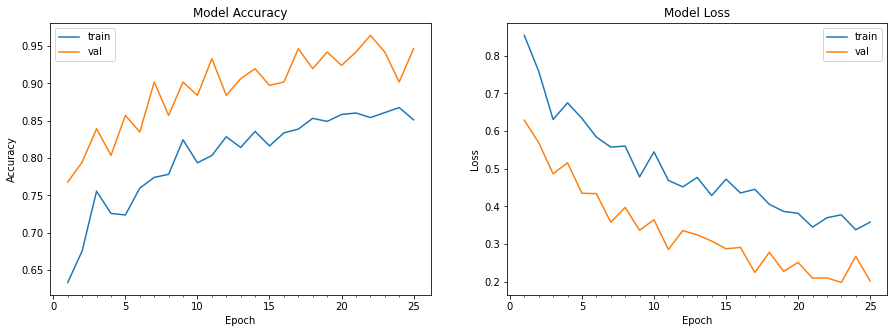

In [ ]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[acc]) + 1), len(model_history.history[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    #plt.show()
    plt.savefig('roc.png')
plot_model_history(H, acc='accuracy', val_acc='val_accuracy')

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False
opt = RMSprop(0.001)
model.compile(opt, 'categorical_crossentropy', ['accuracy'])
numOfEpoch = 25
H = model.fit_generator(aug_train.flow(X_train, y_train, batch_size=32),
steps_per_epoch=len(X_train)//32,
validation_data=(aug_test.flow(X_test, y_test, batch_size=32)),validation_steps=len(X_test)//32,
epochs=numOfEpoch)

<a name="machine-learning-examples"></a>

## Ví dụ về máy học

Để xem các ví dụ toàn diện về những phép phân tích máy học tương tác mà Colaboratory có thể hỗ trợ, hãy xem các hướng dẫn sau bằng cách sử dụng các mô hình từ <a href="https://tfhub.dev">TensorFlow Hub</a>.

Một vài sổ tay mẫu nổi bật:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Huấn luyện lại trình phân loại hình ảnh</a>: Tạo một mô hình Keras cùng với trình phân loại hình ảnh đã được huấn luyện trước để phân biệt các loại hoa.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Phân loại văn bản</a>: Phân loại các bài đánh giá phim trên IMDB là <em>tích cực</em> hoặc <em>tiêu cực</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Sao chép phong cách</a>: Sử dụng mô hình học sâu để sao chép phong cách giữa các hình ảnh.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Hỏi và đáp về Bộ mã hóa câu tổng quát đa ngôn ngữ</a>: Sử dụng một mô hình máy học để giải đáp các câu hỏi từ tập dữ liệu SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Nội suy video</a>: Dự đoán những điều đã xảy ra trong một video từ khung hình đầu tiên đến khung hình cuối cùng.
